In [44]:
import pandas as pd
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Get the current directory of the notebook
current_dir = os.path.dirname(os.path.abspath(""))

# Navigate up two levels to reach the Project4 directory
project_dir = os.path.dirname(current_dir)

# Define the path to the PCA data folder
pca_data_folder = os.path.join(project_dir, "data/pca_data")

# Initialize lists to hold all features and target variable
all_features = ['PC1', 'PC2', 'PC3']
target_variable = 'Li'  # Assuming 'Li' is the target variable

# Initialize empty lists to hold data for concatenation
X_list = []
y_list = []

# Iterate over each PCA data file in the folder
for file_name in os.listdir(pca_data_folder):
    if file_name.endswith(".csv"):
        basin_name = os.path.splitext(file_name)[0]
        file_path = os.path.join(pca_data_folder, file_name)
        
        # Load PCA data for the current basin
        df_pca = pd.read_csv(file_path)
        
        # Extract features and target variable
        X_basin = df_pca[all_features]  # Features
        y_basin = df_pca[target_variable]  # Target variable
        
        # Append to the lists
        X_list.append(X_basin)
        y_list.append(y_basin)

# Concatenate all basin data
X = pd.concat(X_list)
y = pd.concat(y_list)

# Impute missing values in the target variable (y)
y_imputer = SimpleImputer(strategy='mean')
y = y_imputer.fit_transform(y.values.reshape(-1, 1)).ravel()


In [46]:
# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [47]:
# Define the pipeline with preprocessing and logistic regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('log_reg_model', LogisticRegression())
])


In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Define and train the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [56]:
# Define the mean_absolute_error function
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Call the mean_absolute_error function and print the result
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 4.585179721394701


In [57]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 426.6695327436449
Root Mean Squared Error: 20.65598055633392
R-squared (R2) Score: -0.6498195072365969


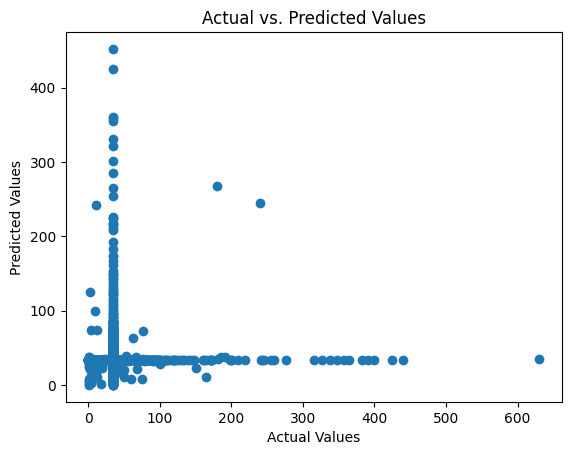

In [58]:
# Actual vs Predicted Plots 
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


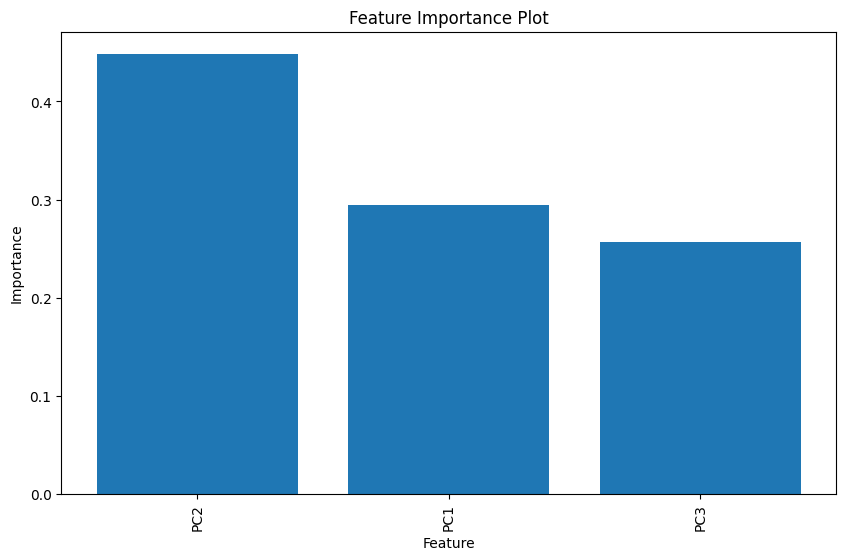

In [74]:
# Visualize feature importance
feature_importances = model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = [all_features[i] for i in sorted_idx]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), sorted_features, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance Plot")
plt.show()

In [75]:

# Hyperparameter tuning
# Example: Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  44.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  41.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  57.9s


KeyboardInterrupt: 

In [76]:
# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-Validation RMSE scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))